<!-- Markdown Cell -->

<h2 style="color: #2c3e50; background-color: #ecf0f1; padding: 10px; border-left: 5px solid #3498db; font-family: Arial;">
  📦 Import Required Libraries
</h2>

<div style="background-color: #f9f9f9; padding: 10px; border-left: 4px solid #7f8c8d; font-family: Arial;">
  In this section, I am importing the essential Python libraries required for data processing, visualization, and cleaning.
</div>


In [1]:
import pandas as pd
import missingno as msno
from ydata_profiling import ProfileReport

<h2 style="color: #2c3e50; background-color: #eaf2f8; padding: 12px; border-left: 6px solid #2980b9; font-family: Arial;">
  🌐 Load Dataset from FBref Website
</h2>

<div style="background-color: #fdfefe; padding: 10px 15px; border-left: 4px solid #5dade2; font-family: Arial; font-size: 15px; line-height: 1.6;">
  I am using football data scraped from the official <strong><a href="https://fbref.com" target="_blank" style="color:#2980b9; text-decoration:none;">FBref</a></strong> website. This dataset includes data from top 5 league(Epl, La Liga, Serie A, Bundesliga,Ligue 1). It includes advanced player statistics such as goals, assists, xG, and minutes played per 90 minutes.
  <br><br>
  ✅ <strong>Source URL:</strong> 
  <a href="https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats" target="_blank" style="color:#1a5276; font-weight:bold;">
    "https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"
  </a>
</div>


In [2]:
url="https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"

In [3]:
# Read table using header=1 to skip the unnecessary first row

tables=pd.read_html(url,header=[1])

In [4]:
# Since the FBref page contains only one table, we directly access it using tables[0]
df = tables[0]

In [5]:
# Display all columns in the DataFrame output without truncation
pd.set_option('display.max_columns', None)

In [6]:
#Explore top 5 rows to understand data
df.head(5)

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1,Matches
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24,2000,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24,2000,4,1,120,1.3,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0,6,10,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.02,Matches
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21,2003,1,1,65,0.7,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,3,2,3,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.10,0.10,0.10,Matches
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20,2004,6,0,88,1.0,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,3,4,1,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.06,0.06,Matches
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18,2006,1,0,3,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Matches


In [7]:
# The dimensions of the DataFrame (rows, columns)
df.shape

(2968, 38)

<h2 style="color: #2c3e50; font-family: Arial, sans-serif; background-color: #f0f4f8; padding: 12px; border-left: 6px solid #2980b9;">
  🧹 Clean & Organize Data
</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #34495e; line-height: 1.6;">
  <li>✅ Remove duplicates, handle missing values, and prepare the dataset for analysis.</li>
  <li>✅ Sort the data meaningfully by relevant columns such as date, player name, score, team, etc.</li>
  <li>🔄 Transform columns to appropriate data types or formats for better analysis.</li>
  <li>✏️ Rename columns to clear, descriptive, and consistent names.</li>
  <li>🗑️ Remove unnecessary or irrelevant columns to simplify the dataset and reduce noise.</li>
</ul>


In [8]:
# Counts the total number of duplicate rows in the DataFrame
df.duplicated().sum()


113

In [9]:
# Removes all duplicate rows from the DataFrame in-place (modifies the original DataFrame)
df.drop_duplicates(inplace=True)

<Axes: >

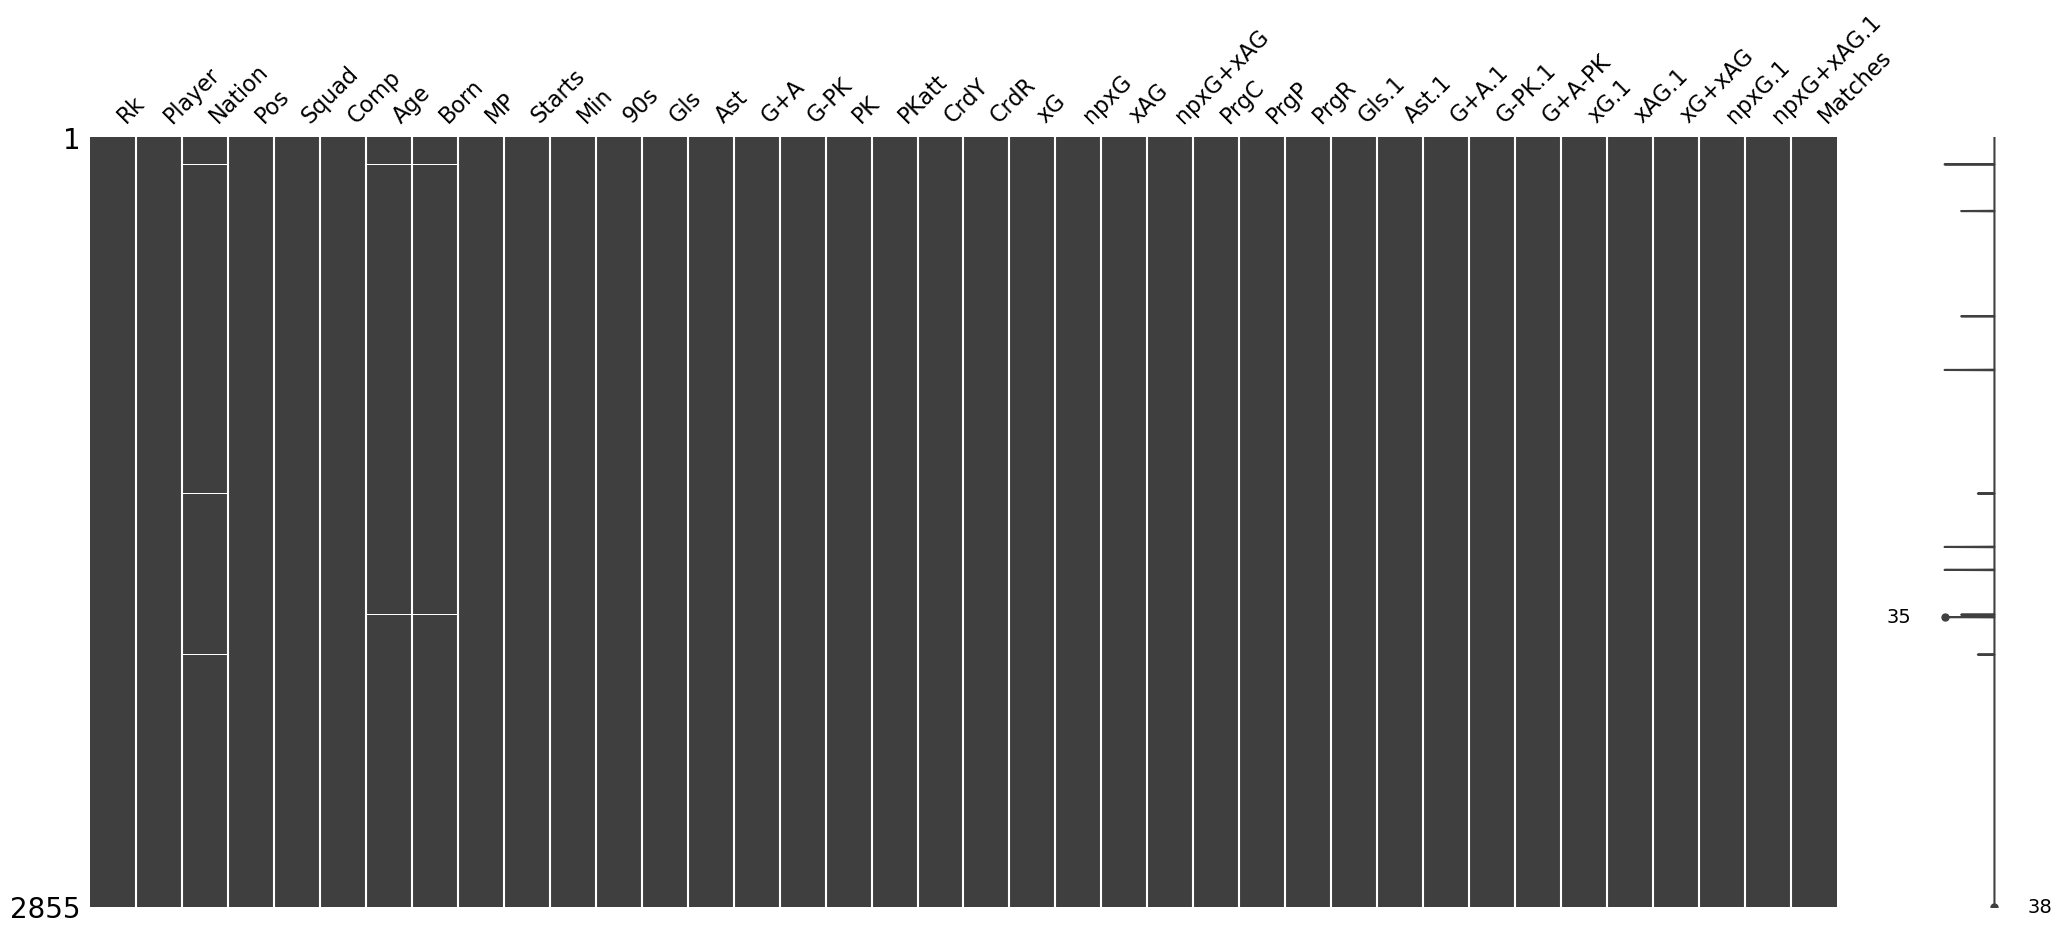

In [10]:
# Visualize the pattern of missing data in the DataFrame using missingno's matrix plot
msno.matrix(df)


In [11]:
# Count the number of missing (null) values in each column of the DataFrame
df.isnull().sum()


Rk            0
Player        0
Nation        7
Pos           0
Squad         0
Comp          0
Age           8
Born          8
MP            0
Starts        0
Min           0
90s           0
Gls           0
Ast           0
G+A           0
G-PK          0
PK            0
PKatt         0
CrdY          0
CrdR          0
xG            0
npxG          0
xAG           0
npxG+xAG      0
PrgC          0
PrgP          0
PrgR          0
Gls.1         0
Ast.1         0
G+A.1         0
G-PK.1        0
G+A-PK        0
xG.1          0
xAG.1         0
xG+xAG        0
npxG.1        0
npxG+xAG.1    0
Matches       0
dtype: int64

In [12]:
# Remove all rows containing missing (NaN) values
# Since there are very few null values, dropping these rows will not significantly affect the dataset
df.dropna(inplace=True)


In [13]:
'''Remove unnecessary columns, There is no need of Born year because there is age column,
matches and Rk is not needed'''
df = df.drop(columns=['Rk', 'Matches', 'Born'])


In [14]:
df.head(3)

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,90s,Gls,Ast,G+A,G-PK,PK,PKatt,CrdY,CrdR,xG,npxG,xAG,npxG+xAG,PrgC,PrgP,PrgR,Gls.1,Ast.1,G+A.1,G-PK.1,G+A-PK,xG.1,xAG.1,xG+xAG,npxG.1,npxG+xAG.1
0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24,4,1,120,1.3,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0,6,10,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.02
2,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21,1,1,65,0.7,0,0,0,0,0,0,1,0,0.1,0.1,0.0,0.1,3,2,3,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.10,0.10,0.10


In [15]:

# Define a concise and professional rename dictionary
rename_dict = {
    'Gls': 'Goals',
    'Ast': 'Assists',
    'G+A': 'GoalsAndAssists',
    'G-PK': 'NonPenaltyGoals',
    'xG': 'ExpGoals',
    'xAG': 'ExpAssists',
    'npxG+xAG': 'NPExpGoalsAndAssists',
    '90s': 'MinutesPer90',
    'PK': 'PenaltiesScored',
    'PKatt': 'PenaltiesAttempted',
    'npxG': 'NPExpGoals',
    'Gls.1': 'GoalsPer90',
    'Ast.1': 'AssistsPer90',
    'G+A.1': 'GoalsAndAssistsPer90',
    'G-PK.1': 'NPGoalsPer90',
    'G+A-PK': 'NPGoalsAndAssistsPer90',
    'xG.1': 'ExpGoalsPer90',
    'xAG.1': 'ExpAssistsPer90',
    'xG+xAG': 'ExpGoalsAndAssistsPer90',
    'npxG.1': 'NPExpGoalsPer90',
    'npxG+xAG.1': 'NPExpGoalsAndAssistsPer90'
}

# Rename the columns
df = df.rename(columns=rename_dict)

# Verify the new column names
print(df.columns)

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'MP', 'Starts',
       'Min', 'MinutesPer90', 'Goals', 'Assists', 'GoalsAndAssists',
       'NonPenaltyGoals', 'PenaltiesScored', 'PenaltiesAttempted', 'CrdY',
       'CrdR', 'ExpGoals', 'NPExpGoals', 'ExpAssists', 'NPExpGoalsAndAssists',
       'PrgC', 'PrgP', 'PrgR', 'GoalsPer90', 'AssistsPer90',
       'GoalsAndAssistsPer90', 'NPGoalsPer90', 'NPGoalsAndAssistsPer90',
       'ExpGoalsPer90', 'ExpAssistsPer90', 'ExpGoalsAndAssistsPer90',
       'NPExpGoalsPer90', 'NPExpGoalsAndAssistsPer90'],
      dtype='object')


In [16]:
df['Nation']

0       eng ENG
1       eng ENG
2        es ESP
3        ie IRL
4        fr FRA
         ...   
2962     fr FRA
2964     pl POL
2965     no NOR
2966     ba BIH
2967     ba BIH
Name: Nation, Length: 2845, dtype: object

In [17]:
# Extract country name
df['Nation'] = df['Nation'].str.split().str[-1]

In [18]:
df['Comp']

0       eng Premier League
1               es La Liga
2               es La Liga
3               it Serie A
4               fr Ligue 1
               ...        
2962            fr Ligue 1
2964            it Serie A
2965    eng Premier League
2966            it Serie A
2967            it Serie A
Name: Comp, Length: 2845, dtype: object

In [19]:
# Update 'Comp' column by splitting the string at the first space and keeping everything after it
df['Comp'] = df['Comp'].str.split(n=1).str[-1]


In [20]:
df['Comp'].value_counts()

Comp
Serie A           634
La Liga           600
Premier League    570
Ligue 1           551
Bundesliga        489
Comp                1
Name: count, dtype: int64

In [21]:
df = df[df['Comp'] != 'Comp']

In [22]:
df.head(2)

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,MinutesPer90,Goals,Assists,GoalsAndAssists,NonPenaltyGoals,PenaltiesScored,PenaltiesAttempted,CrdY,CrdR,ExpGoals,NPExpGoals,ExpAssists,NPExpGoalsAndAssists,PrgC,PrgP,PrgR,GoalsPer90,AssistsPer90,GoalsAndAssistsPer90,NPGoalsPer90,NPGoalsAndAssistsPer90,ExpGoalsPer90,ExpAssistsPer90,ExpGoalsAndAssistsPer90,NPExpGoalsPer90,NPExpGoalsAndAssistsPer90
0,Max Aarons,ENG,DF,Bournemouth,Premier League,24,3,1,86,1.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1,8,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Max Aarons,ENG,"DF,MF",Valencia,La Liga,24,4,1,120,1.3,0,0,0,0,0,0,2,0,0.0,0.0,0.0,0.0,0,6,10,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.02


In [23]:
# Sort the DataFrame alphabetically by the 'Player' column
df = df.sort_values(by='Player')


In [24]:
# Reset the DataFrame index after sorting, dropping the old index to get a clean sequential index
df = df.reset_index(drop=True)


In [25]:
df.head(3)

,Player,Nation,Pos,Squad,Comp,Age,MP,Starts,Min,MinutesPer90,Goals,Assists,GoalsAndAssists,NonPenaltyGoals,PenaltiesScored,PenaltiesAttempted,CrdY,CrdR,ExpGoals,NPExpGoals,ExpAssists,NPExpGoalsAndAssists,PrgC,PrgP,PrgR,GoalsPer90,AssistsPer90,GoalsAndAssistsPer90,NPGoalsPer90,NPGoalsAndAssistsPer90,ExpGoalsPer90,ExpAssistsPer90,ExpGoalsAndAssistsPer90,NPExpGoalsPer90,NPExpGoalsAndAssistsPer90
0,Aaron Ciammaglichella,ITA,MF,Torino,Serie A,19,1,0,1,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,Aaron Cresswell,ENG,DF,West Ham,Premier League,34,18,10,824,9.2,0,0,0,0,0,0,3,0,0.2,0.2,1.3,1.6,6,36,4,0.00,0.00,0.00,0.00,0.00,0.03,0.15,0.17,0.03,0.17
2,Aaron Malouda,FRA,FW,Lille,Ligue 1,18,1,0,2,0.0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [26]:
# Display concise summary of the DataFrame including index dtype, column dtypes, non-null counts, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2844 entries, 0 to 2843
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Player                     2844 non-null   object
 1   Nation                     2844 non-null   object
 2   Pos                        2844 non-null   object
 3   Squad                      2844 non-null   object
 4   Comp                       2844 non-null   object
 5   Age                        2844 non-null   object
 6   MP                         2844 non-null   object
 7   Starts                     2844 non-null   object
 8   Min                        2844 non-null   object
 9   MinutesPer90               2844 non-null   object
 10  Goals                      2844 non-null   object
 11  Assists                    2844 non-null   object
 12  GoalsAndAssists            2844 non-null   object
 13  NonPenaltyGoals            2844 non-null   object
 14  Penaltie

<div style="background-color: #e8f4fd; border-left: 5px solid #2196F3; padding: 10px;">
  <strong>Purpose:</strong> This code changes the data types of specific columns to ensure proper format and optimize memory usage.
</div>


In [27]:

# Define column groups
text_columns = ['Player', 'Nation', 'Pos', 'Squad', 'Comp']
int_columns = ['Age', 'MP', 'Starts', 'Min', 'Goals', 'Assists', 'GoalsAndAssists', 
               'NonPenaltyGoals', 'PenaltiesScored', 'PenaltiesAttempted', 'CrdY', 
               'CrdR', 'PrgC', 'PrgP', 'PrgR']
float_columns = ['MinutesPer90', 'ExpGoals', 'NPExpGoals', 'ExpAssists', 
                 'NPExpGoalsAndAssists', 'GoalsPer90', 'AssistsPer90', 
                 'GoalsAndAssistsPer90', 'NPGoalsPer90', 'NPGoalsAndAssistsPer90', 
                 'ExpGoalsPer90', 'ExpAssistsPer90', 'ExpGoalsAndAssistsPer90', 
                 'NPExpGoalsPer90', 'NPExpGoalsAndAssistsPer90']

# Convert object data type to Int64
for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# Convert object data type to float64
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')

# Text columns remain as object (no conversion needed)

# Verify data types
print(df.dtypes)

Player                        object
Nation                        object
Pos                           object
Squad                         object
Comp                          object
Age                            Int64
MP                             Int64
Starts                         Int64
Min                            Int64
MinutesPer90                 float64
Goals                          Int64
Assists                        Int64
GoalsAndAssists                Int64
NonPenaltyGoals                Int64
PenaltiesScored                Int64
PenaltiesAttempted             Int64
CrdY                           Int64
CrdR                           Int64
ExpGoals                     float64
NPExpGoals                   float64
ExpAssists                   float64
NPExpGoalsAndAssists         float64
PrgC                           Int64
PrgP                           Int64
PrgR                           Int64
GoalsPer90                   float64
AssistsPer90                 float64
G

In [28]:
df.to_csv('../Data/cleaned_sports_data.csv')